Belgian Fieldstone Sample
=========================

This sample is a micro-CT scan of a 4 mm diameter glauconite-rich sandstone sample, by Tom Bultreys and Wesley De Boever, 
acquired with 4.98 micrometer voxel length at Ghent University's Centre for X-ray Tomography
and hosted at [Digital Rocks Portal](https://www.digitalrocksportal.org/).

.. note::
   If you plan to use this data, please remember to [cite the data](https://www.digitalrocksportal.org/projects/297/cite/)
   and the
   [related publications](https://www.digitalrocksportal.org/projects/297/publications/).



Go to the Belgian Fieldstone project in the Digital Rocks Portal:
https://www.digitalrocksportal.org/projects/297. Click on `Micro-CT scan`.

<img src="import_belgian_fieldstone-img1.jpg" width="500"/>

   
Pay attention to the metadata! We'll need it later. An extra piece of information: this raw data is in Fortran file order.
Click `Action->Download File`.

<img src="import_belgian_fieldstone-img2.jpg" width="250"/>

Let's import the raw file into a RockVerse voxel image. In this example we'll use 8 chunks, halving the total number of voxels in each direction:

In [1]:
import rockverse as rv

belgian_fieldstone_data = rv.voxel_image.import_raw(
    rawfile='/path/to/rawdata/BelgianFieldstone/Fieldstone_1000x1000x861_16b.raw',
    store='/path/to/imported/BelgianFieldstone/original',  #<- path to the imported the voxel image
    shape=(1000, 1000, 861),         #<- From metadata, image size
    dtype='>u2',                     #<- From metadata, big-endian 16-bit unsigned integer
    offset=0,                        #<- From metadata
    voxel_length=(4.98, 4.98, 4.98), #<- From metadata
    voxel_unit='um',                 #<- From metadata, micrometer
    raw_file_order='F',              #<- Fortran file order
    chunks=(500, 500, 431),          #<- Our choice of chunk size will give a 2x2x2 chunk grid
    field_name='Attenuation',        #<- Our choice for field name (X-ray attenuation)
    field_unit='a.u.',               #<- Our choice for field units (arbitrary units)
    description='Belgian Fieldstone original X-ray CT',
    overwrite=True                   #<- Overwrite if file exists in disk
    )

[2024-12-23 14:42:58] (Attenuation) Importing raw file: 100%|>>>>>>>>>>| 8/8 [00:18<00:00,  2.34s/chunk]


The image now is available as a RockVerse voxel image in disk, at the path given in the ``store`` parameter. Remember: RockVerse voxel images are modified Zarr arrays, so you can use all the original properties and methods. Let's take a look at the general structure:

In [2]:
belgian_fieldstone_data.info

Type,rockverse.voxel_image.VoxelImage
Data type,uint16
Shape,"(1000, 1000, 861)"
Chunk shape,"(500, 500, 431)"
Order,C
Read-only,False
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,1722000000 (1.6G)
No. bytes stored,1323693972 (1.2G)
Storage ratio,1.3


Notice the chunk order was changed to C for cache optimization. 
Digital rock metadata are stored as zarr attributes:

In [3]:
for k,v in belgian_fieldstone_data.attrs.items():
    print(f"{k}: {v}")

_ROCKVERSE_DATATYPE: VoxelImage
description: Belgian Fieldstone original X-ray CT
field_name: Attenuation
field_unit: a.u.
voxel_length: [4.98, 4.98, 4.98]
voxel_origin: [0, 0, 0]
voxel_unit: um


But you can access them directly through the corresponding ``VoxelImage`` properties (check the 
[API documentation](../../../api/digitalrock/voxelimage.rst)
 for more details):

In [4]:
print(f'''
Field name: {belgian_fieldstone_data.field_name},
Field unit: {belgian_fieldstone_data.field_unit},
Image size: {belgian_fieldstone_data.shape}
dtype: {belgian_fieldstone_data.dtype},
Voxel length: {belgian_fieldstone_data.voxel_length} {belgian_fieldstone_data.voxel_unit},
Image size per dimension: ({belgian_fieldstone_data.nx}, {belgian_fieldstone_data.ny}, {belgian_fieldstone_data.nz})
Voxel length per dimension: ({belgian_fieldstone_data.hx}, {belgian_fieldstone_data.hy}, {belgian_fieldstone_data.hz}) {belgian_fieldstone_data.h_unit}
''')


Field name: Attenuation,
Field unit: a.u.,
Image size: (1000, 1000, 861)
dtype: uint16,
Voxel length: (4.98, 4.98, 4.98) um,
Image size per dimension: (1000, 1000, 861)
Voxel length per dimension: (4.98, 4.98, 4.98) um



[2024-12-23 14:43:17] Histogram Attenuation (min/max): 100%|>>>>>>>>>>| 8/8 [00:01<00:00,  5.07chunk/s]
[2024-12-23 14:43:19] Histogram Attenuation (counting voxels): 100%|>>>>>>>>>>| 8/8 [00:23<00:00,  2.96s/chunk]
C:\Users\GOB7\OneDrive - PETROBRAS\Documents\Projetos\rockverse\src\rockverse\digitalrock\orthogonal_slices.py:692: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self._fig.show()


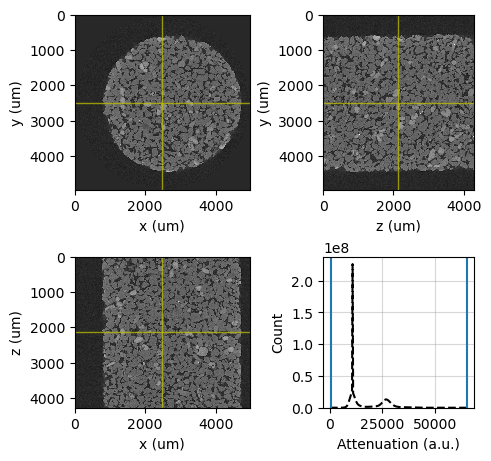

In [5]:
viewer = rv.digitalrock.OrthogonalViewer(belgian_fieldstone_data)


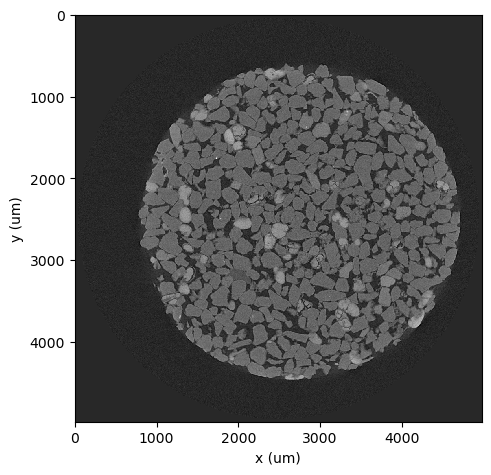

In [6]:
viewer.show_guide_lines = False
viewer.show_histogram = False
viewer.show_zy_plane = False
viewer.show_xz_plane = False
viewer.figure
